<a href="https://colab.research.google.com/github/MeldaChen/Group-4/blob/main/1201%E5%9C%96%E7%89%87%E8%BD%89%E6%AD%A3-%E8%81%96%E6%99%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

line =  7
contour= 4
這裡是偵測對象的外框


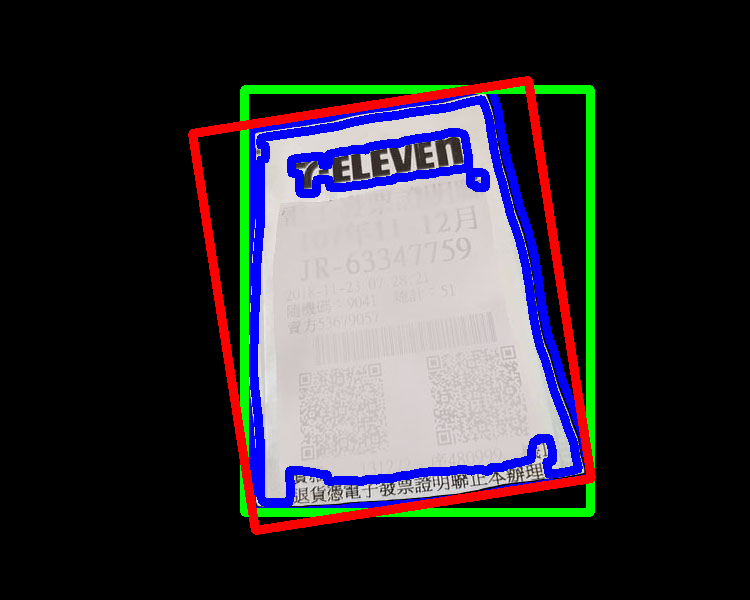

角度 =  81.08507537841797


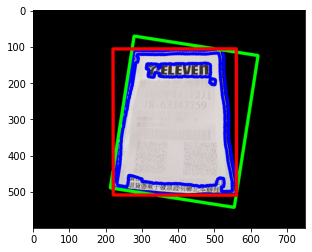

In [ ]:
from traitlets.traitlets import Int
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot
from scipy.stats import gaussian_kde

img = cv2.imread('receipt_bg2.jpg')
img_debug = img.copy()   
line_width = int(img.shape[1]/100)

print('line = ',line_width)
gray = cv2.cvtColor(img_debug,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0) 
edge = cv2.Canny(gray,70,210)
morph = cv2.morphologyEx(edge, cv2.MORPH_GRADIENT, np.ones((10, 10))) 

contours, hierachy = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("contour=",len(contours))



cv2.drawContours(img_debug, contours, -1, (255,0,0), line_width)

c = max(contours, key = cv2.contourArea)

# print('xywh = ',x,y,w,h)
x,y,w,h = cv2.boundingRect(c)                           
cv2.rectangle(img_debug, (x, y), (x+w, y+h), (0,255,0), line_width)
print('這裡是偵測對象的外框')

# 算出傾斜邊緣
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_debug, [box], 0, (0, 0, 255), line_width)
cv2_imshow(img_debug)

# minArea vs getRotation 角度是相反
print('角度 = ',rect[2])
angle = rect[2]
if angle < 90:
  angle = -(90 - angle)

(h, w) = img.shape[:2]
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)

rotated = cv2.warpAffine(img_debug, M, (w, h), flags=cv2.INTER_CUBIC, borderMode = cv2.BORDER_CONSTANT)
final = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode= cv2.BORDER_CONSTANT)

pyplot.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
# pyplot.show()

